In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Datasets/Daily Sales-Oct'23 to Sep'24.xlsx")

In [4]:
df.head()

,Date,Revnue(Rs.)
0,2023-10-01,7675.03
1,2023-10-02,8732.16
2,2023-10-03,13807.56
3,2023-10-04,13174.10
4,2023-10-05,15614.46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         366 non-null    object 
 1   Revnue(Rs.)  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         366 non-null    datetime64[ns]
 1   Revnue(Rs.)  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [7]:
df.isnull().sum()

Date           0
Revnue(Rs.)    0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


In [9]:
df['Revnue(Rs.)'].describe().T

count      366.000000
mean     11347.349973
std       5105.190138
min       2353.460000
25%       7625.922500
50%      10801.095000
75%      14258.042500
max      28093.250000
Name: Revnue(Rs.), dtype: float64

In [10]:
# Summary of Descriptive Statistics of Revenue column :
# 1. This confirms I have revenue data for a full year (366 days), meaning the dataset likely includes data from a leap year.
# 2. On average, your business generates around ₹11,347 per day.
# 3. The standard deviation of ₹5,105 indicates a significant variation in daily revenue, Higher standard deviation means revenue fluctuates a lot across different days.
# 4. The lowest revenue recorded on any day was ₹2,353. This could indicate a very slow sales day, possibly due to external factors (holidays, bad weather, etc.).
# 5. The highest revenue in a single day was ₹28,093, which is significantly above the average,It would be interesting to identify what caused this spike (special event, discounts, holiday, etc.).
# 6. 25% (Q1) = ₹7,625.92 → 25% of the days had revenue below ₹7,625.
#    50% (Median) = ₹10,801.09 → Half of the days had revenue below ₹10,801.
#    75% (Q3) = ₹14,258.04 → 75% of the days had revenue below ₹14,258, meaning only the top 25% of days had revenue above this amount

In [11]:
# The large gap between min (₹2,353) and max (₹28,093) suggests high fluctuations.
# The median (₹10,801) is slightly lower than the mean, indicating a few very high revenue days are pulling the average up.
# The revenue distribution is likely right-skewed, meaning a few days had extremely high sales.
# A standard deviation of ₹5,105 means revenue is quite volatile—factors like promotions, holidays, or seasonal demand may strongly affect sales.

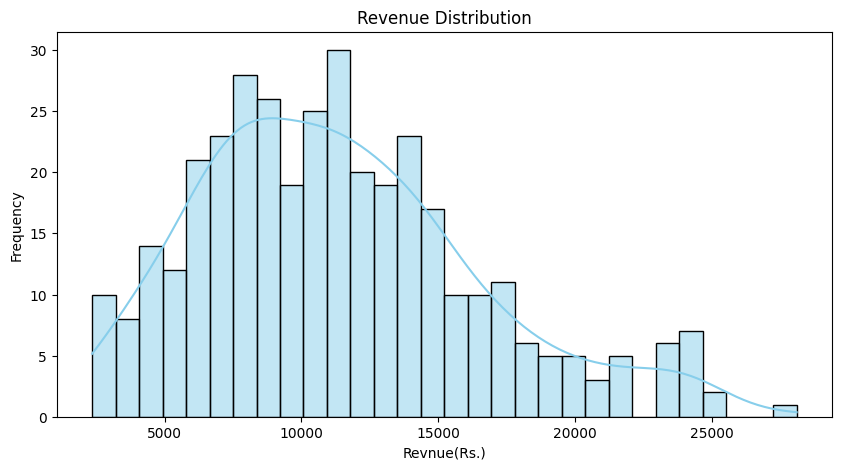

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['Revnue(Rs.)'], bins=30, kde=True, color='skyblue')
plt.xlabel('Revnue(Rs.)')
plt.ylabel('Frequency')
plt.title('Revenue Distribution')
plt.show()

In [13]:
# The distribution is right-skewed (positively skewed), meaning that most days have lower to mid-range revenue, while a few days have very high revenue (above ₹20,000).
# The peak (mode) appears around ₹8,000 - ₹12,000, which means most days fall in this revenue range.

# Revenue fluctuates significantly, as seen from the spread of the histogram.
# Some days have revenue as low as ₹2,500, while some reach as high as ₹28,000, confirming a high variance.

# The tail on the right (values above ₹20,000) represents a few high-revenue days. I should investigate:
# Were these special occasions? (festivals, promotions, discounts)
# Were these weekends or specific high-sales days?
# Was there an external factor influencing sales?

# The left part (below ₹5,000) shows a small number of low-revenue days. I should check:
# Were these due to holidays, bad weather, or operational issues?
# Were there any customer demand drops?

In [14]:
# The number of bins controls how detailed the histogram is:
# Too Few Bins (e.g., 10-15) → Oversimplifies the data, making trends harder to see.
# Too Many Bins (e.g., 50-100) → Creates too much noise, making patterns unclear.
# Optimal Choice (30 bins) → Gives a balanced view with enough detail but without too much noise.

In [15]:
df[df['Revnue(Rs.)'] > 20000]

,Date,Revnue(Rs.)
246,2024-06-03,21010.30
253,2024-06-10,20026.46
324,2024-08-20,24872.79
325,2024-08-21,25199.29
326,2024-08-22,23823.99
327,2024-08-23,23885.14
328,2024-08-24,21130.06
332,2024-08-28,20208.02
334,2024-08-30,21845.00
337,2024-09-02,21411.00


In [16]:
df[df['Revnue(Rs.)'] < 5000]

,Date,Revnue(Rs.)
35,2023-11-05,4376.77
42,2023-11-12,2423.46
49,2023-11-19,4704.24
56,2023-11-26,3984.88
59,2023-11-29,4758.31
63,2023-12-03,3890.65
70,2023-12-10,2655.99
77,2023-12-17,4182.42
84,2023-12-24,3664.85
85,2023-12-25,3003.48


In [17]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.groupby('DayOfWeek')['Revnue(Rs.)'].mean().sort_values()

DayOfWeek
Sunday        6062.917925
Thursday     11570.339808
Friday       11994.889038
Wednesday    12092.938846
Saturday     12282.680000
Tuesday      12345.287885
Monday       13149.365849
Name: Revnue(Rs.), dtype: float64

In [18]:
# Sunday has the lowest average revenue (~6062 Rs.)
# Monday has the highest average revenue (~13149 Rs.)
# Weekdays (Monday to Friday) have relatively higher revenues than weekends (Saturday and Sunday).

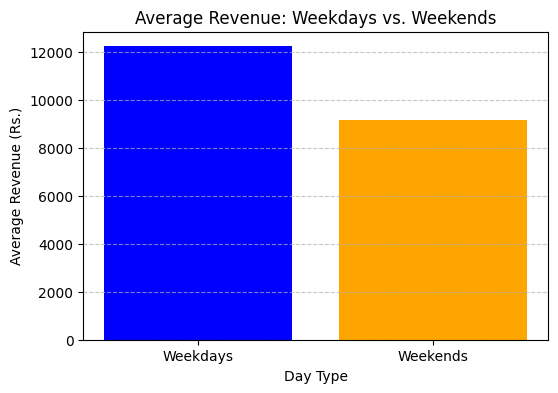

In [19]:
# Extract weekday (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Date'].dt.dayofweek

# Separate Weekday (0-4) and Weekend (5-6) revenue
weekday_revenue = df[df['Weekday'] < 5]['Revnue(Rs.)'].mean()
weekend_revenue = df[df['Weekday'] >= 5]['Revnue(Rs.)'].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(["Weekdays", "Weekends"], [weekday_revenue, weekend_revenue], color=['blue', 'orange'])

# Labels
plt.xlabel("Day Type")
plt.ylabel("Average Revenue (Rs.)")
plt.title("Average Revenue: Weekdays vs. Weekends")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

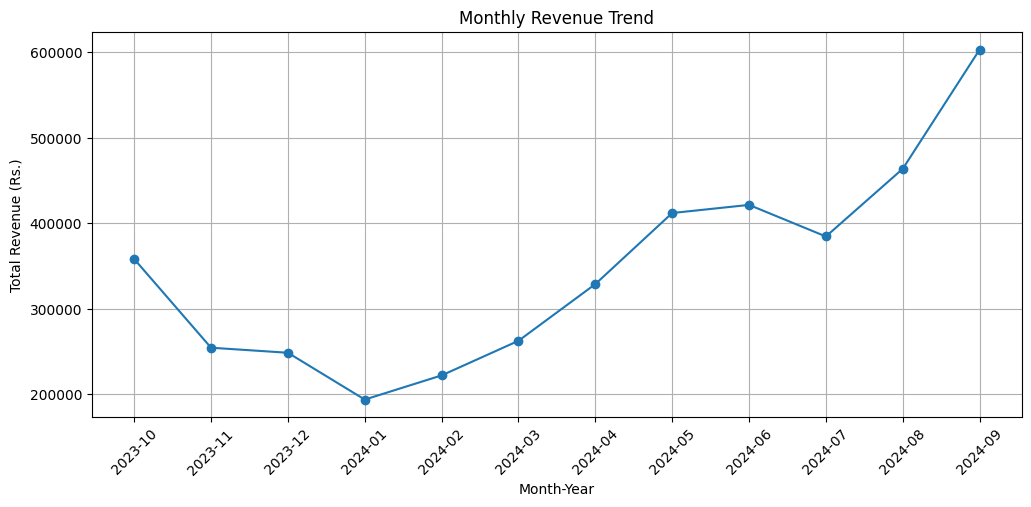

In [20]:
df['YearMonth'] = df['Date'].dt.to_period('M')  # Extract Year-Month
df_monthly = df.groupby('YearMonth')['Revnue(Rs.)'].sum().reset_index()

# Plot the monthly trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_monthly['YearMonth'].astype(str), df_monthly['Revnue(Rs.)'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue (Rs.)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
# Revenue steadily decreased from October 2023 to January 2024, hitting the lowest point in January 2024.
# From February 2024, revenue started recovering gradually.
# After a steady increase till June 2024, there is a slight dip in July 2024 before it rises again in August and September.
# Revenue surged significantly in August & September 2024.

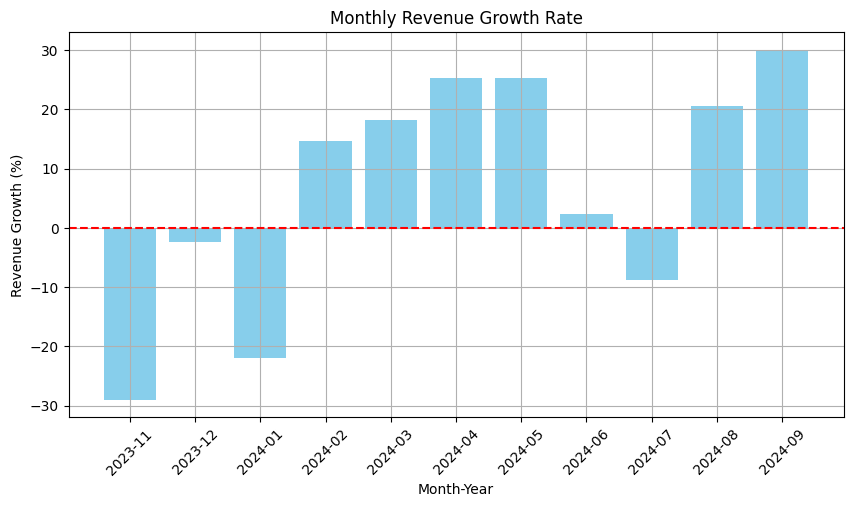

In [22]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['Revnue(Rs.)'].sum().reset_index()
monthly_revenue['Growth(%)'] = monthly_revenue['Revnue(Rs.)'].pct_change() * 100

# Plot Growth Rate
plt.figure(figsize=(10,5))
plt.bar(monthly_revenue['YearMonth'].astype(str), monthly_revenue['Growth(%)'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Month-Year")
plt.ylabel("Revenue Growth (%)")
plt.title("Monthly Revenue Growth Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
# November 2023 saw a sharp drop of nearly -30% (biggest decline).
# January 2024 also had a decline of around -20%, indicating weak sales during these months.

# Continuous positive growth with peaks in April & May 2024 (~25% growth).
# Indicates successful business strategies, new marketing efforts, or seasonal demand.

# A small dip in July (~ -5%), but August and September saw high recovery (~30%).

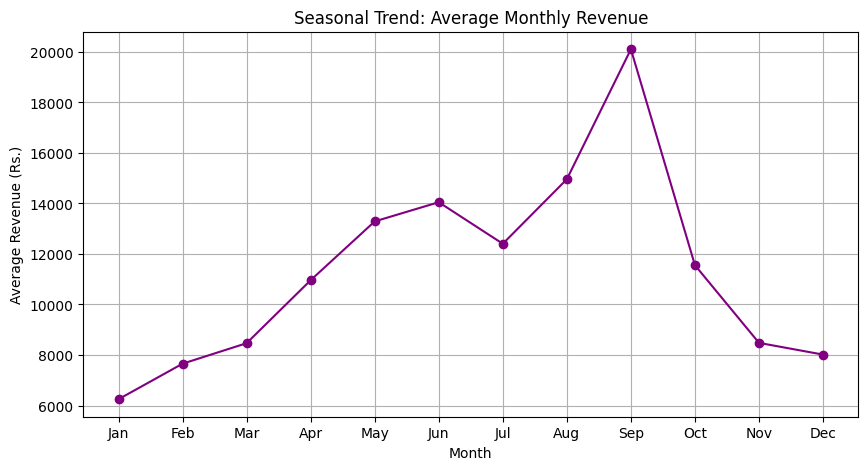

In [24]:
# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate average revenue for each month across all years
seasonal_trend = df.groupby('Month')['Revnue(Rs.)'].mean()

# Plot the seasonal trend
plt.figure(figsize=(10,5))
plt.plot(seasonal_trend.index, seasonal_trend.values, marker='o', linestyle='-', color='purple')

plt.xlabel("Month")
plt.ylabel("Average Revenue (Rs.)")
plt.title("Seasonal Trend: Average Monthly Revenue")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [25]:
# Revenue is lowest in January (~6,000 Rs.) and gradually increases over the months.
# A steady rise is observed from February to May, indicating a growth phase.
# Revenue slightly dips in July but rises again in August.
# September shows the highest revenue (~20,000 Rs.)

In [ ]:
# Create a 'Month' column
df['Month'] = df['Date'].dt.to_period('M').astype(str)  # Example: '2023-10'

In [27]:
# Group by 'Month' and calculate variance of revenue
monthly_variance = df.groupby('Month')['Revnue(Rs.)'].var().reset_index()
monthly_variance.columns = ['Month', 'Revenue Variance']

# Print the variance table
print(monthly_variance)

      Month  Revenue Variance
0   2023-10      9.778711e+06
1   2023-11      6.769577e+06
2   2023-12      9.271875e+06
3   2024-01      4.458923e+06
4   2024-02      6.839070e+06
5   2024-03      9.086789e+06
6   2024-04      1.371858e+07
7   2024-05      1.225301e+07
8   2024-06      1.442903e+07
9   2024-07      8.163547e+06
10  2024-08      3.169032e+07
11  2024-09      2.202796e+07


/tmp/ipykernel_48448/2252123394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_variance, x='Month', y='Revenue Variance', palette='coolwarm')


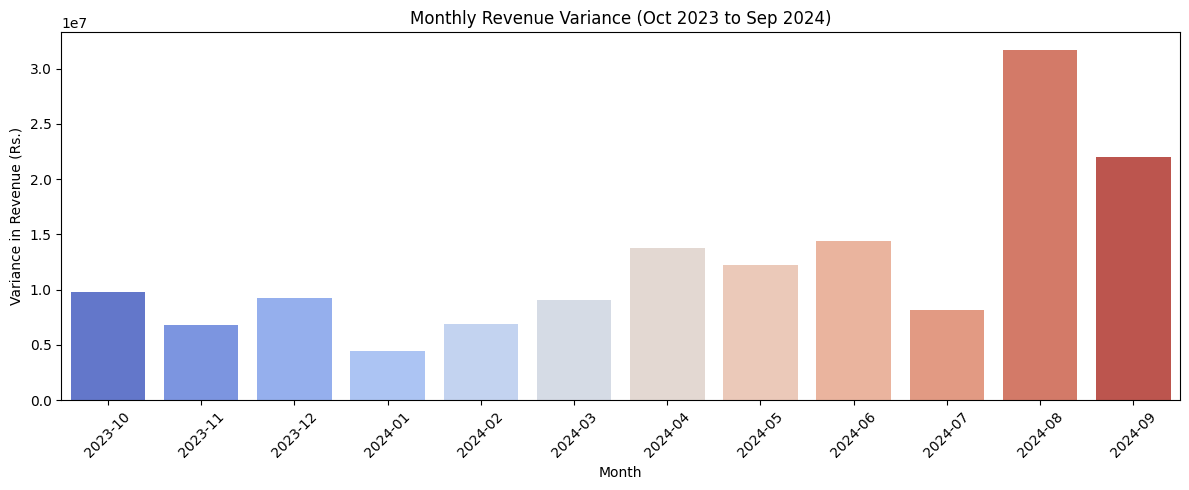

In [29]:
# Optional: Plot the variance
plt.figure(figsize=(12,5))
sns.barplot(data=monthly_variance, x='Month', y='Revenue Variance', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Variance (Oct 2023 to Sep 2024)")
plt.ylabel("Variance in Revenue (Rs.)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [30]:
# High Variance Months (e.g., Aug, Jun, Sep)
# Could indicate:

# Big promotions or offers on some days only

# Sudden spikes (festivals/events) followed by low days

# Inconsistency in customer flow

# Supply or staff issues (some days very high, others very low)

# 📌 Action: Check calendar — was there a festival, discount week, or delivery issue?

# 🔻 Low Variance Months (e.g., Jan, Nov)
# Revenue was more stable across the days

# Could mean:

# Regular customer flow

# No special events/offers

# Business ran smoothly

# 📌 Action: These are ideal months — use them as a baseline or benchmark.



In [31]:
 #Step 2: Group by Month and find min and max revenue
monthly_max_min = df.groupby('Month')['Revnue(Rs.)'].agg(['min', 'max']).reset_index()
monthly_max_min.columns = ['Month', 'Min_Revenue', 'Max_Revenue']

monthly_max_min

,Month,Min_Revenue,Max_Revenue
0,2023-10,5660.40,17702.94
1,2023-11,2423.46,12519.19
2,2023-12,2655.99,17387.58
3,2024-01,2472.10,11086.23
4,2024-02,2562.40,14632.20
5,2024-03,2353.46,13981.25
6,2024-04,2899.20,16567.34
7,2024-05,4491.48,19272.82
8,2024-06,7310.17,21010.30
9,2024-07,6350.93,16953.31


In [32]:
#: Calculate standard deviation directly
monthly_std = df.groupby('Month')['Revnue(Rs.)'].std().reset_index()
monthly_std.columns = ['Month', 'Revenue_Std_Dev']

monthly_std

,Month,Revenue_Std_Dev
0,2023-10,3127.093051
1,2023-11,2601.840987
2,2023-12,3044.975383
3,2024-01,2111.616237
4,2024-02,2615.161541
5,2024-03,3014.430182
6,2024-04,3703.860694
7,2024-05,3500.430049
8,2024-06,3798.556503
9,2024-07,2857.192167


In [33]:
# Step 4: Merge all insights
monthly_summary = pd.merge(monthly_max_min, monthly_std, on='Month')
monthly_summary

,Month,Min_Revenue,Max_Revenue,Revenue_Std_Dev
0,2023-10,5660.40,17702.94,3127.093051
1,2023-11,2423.46,12519.19,2601.840987
2,2023-12,2655.99,17387.58,3044.975383
3,2024-01,2472.10,11086.23,2111.616237
4,2024-02,2562.40,14632.20,2615.161541
5,2024-03,2353.46,13981.25,3014.430182
6,2024-04,2899.20,16567.34,3703.860694
7,2024-05,4491.48,19272.82,3500.430049
8,2024-06,7310.17,21010.30,3798.556503
9,2024-07,6350.93,16953.31,2857.192167


In [34]:
# 1. Most Stable Month (Least Fluctuation)
# January (2024-01) has the lowest standard deviation (~₹2.1k).

# Meaning: Daily revenue during Jan was quite consistent and predictable, with no big highs or lows.

# ✅ Use Case: Safe month for cost planning or steady promotions.

#  2. Most Volatile Month (High Fluctuation)
# August and September have very high Std Dev (₹5.6k & ₹4.6k).

# Their Max revenue is also very high (₹25.1k & ₹28k).

# This suggests some very high-performing days, probably due to:

# Festivals

# Special promotions

# Events / High footfall days

# ⚠️ Use Case: Plan well in advance — staffing, inventory, and marketing need to scale up.

#  3. June's Pattern
# High min revenue (₹7.3k) → Good baseline even on weak days.

# Max is ₹21k, Std Dev ~₹3.8k → Suggests June is a strong and stable month.

# ✅ Use Case: Ideal month to test new items or offers — you already have good daily traffic.

#  4. Months With Moderate Revenue Spread
# Months like March, May, April have moderate Std Dev (~3k–3.7k).

# Indicates a healthy variability: neither too predictable nor too volatile.

# If you're planning:

# Promotions → Do it in June, Aug, or Sep (high peak potential)

# Testing new items → Try in Jan or Feb (stable and low-risk)

# Understanding customer behavior → Study August & September in detail